<a href="https://colab.research.google.com/github/rimgosu/ColabBackup/blob/master/ex03_%ED%99%9C%EC%84%B1%ED%99%94%ED%95%A8%EC%88%98%2C_%EC%B5%9C%EC%A0%81%ED%99%94%ED%95%A8%EC%88%98%2C_callback%ED%95%A8%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 목표
- 활성화 함수와 경사하강법 최적의 조합을 확인해보자
- 모델링에 도움이 되는 callback 함수 (모델 저장, 조기학습 중단)을 알아보자!

### 데이터 로딩

In [1]:
from tensorflow.keras.datasets import mnist # 손글씨 데이터

In [2]:
# 데이터 분리
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# 크기확인
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

### 활성화 함수와 경사하강법 조합에 따른 성능 비교
성능 비교
1. sigmoid + SGD 조합
2. relu + SGD 조합
3. relu + adam 조합

# 1. sigmoid + SGD

In [4]:
# 라이브러리 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Flatten
from tensorflow.keras.optimizers import SGD, Adam # 경사하강법 클래스

In [5]:
# 1. sigmoid + SGD 조합
# 1) 신경망 설계
# 뼈대
model1 = Sequential()
# 입력층
model1.add(InputLayer(input_shape=(28,28)))
# 사진데이터 (2차원 => 1차원)
model1.add(Flatten())
# 중간층 (5층 (64,128,256,128,64))
model1.add(Dense(units=64, activation='sigmoid'))
model1.add(Dense(units=128, activation='sigmoid'))
model1.add(Dense(units=256, activation='sigmoid'))
model1.add(Dense(units=128, activation='sigmoid'))
model1.add(Dense(units=64, activation='sigmoid'))
# 출력층
model1.add(Dense(units=10, activation='softmax'))


In [6]:
# 2) 학습 방법 및 평가방법 설정
model1.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = SGD(learning_rate=0.01), # SGD의 기본 학습률 : 0.01
    metrics = ['accuracy']
)

In [7]:
# 3) 학습 # epochs = 20
h1 = model1.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs = 20,
    batch_size=128
)

Epoch 1/20
375/375 [==============================] - 7s 14ms/step - loss: 2.3172 - accuracy: 0.1130 - val_loss: 2.3020 - val_accuracy: 0.1060
Epoch 2/20
375/375 [==============================] - 6s 15ms/step - loss: 2.3012 - accuracy: 0.1140 - val_loss: 2.3023 - val_accuracy: 0.1060
Epoch 3/20
375/375 [==============================] - 5s 12ms/step - loss: 2.3011 - accuracy: 0.1141 - val_loss: 2.3015 - val_accuracy: 0.1060
Epoch 4/20
375/375 [==============================] - 3s 9ms/step - loss: 2.3009 - accuracy: 0.1140 - val_loss: 2.3015 - val_accuracy: 0.1060
Epoch 5/20
375/375 [==============================] - 3s 9ms/step - loss: 2.3008 - accuracy: 0.1140 - val_loss: 2.3013 - val_accuracy: 0.1060
Epoch 6/20
375/375 [==============================] - 3s 9ms/step - loss: 2.3007 - accuracy: 0.1140 - val_loss: 2.3017 - val_accuracy: 0.1060
Epoch 7/20
375/375 [==============================] - 3s 8ms/step - loss: 2.3004 - accuracy: 0.1140 - val_loss: 2.3012 - val_accuracy: 0.1060
Epo

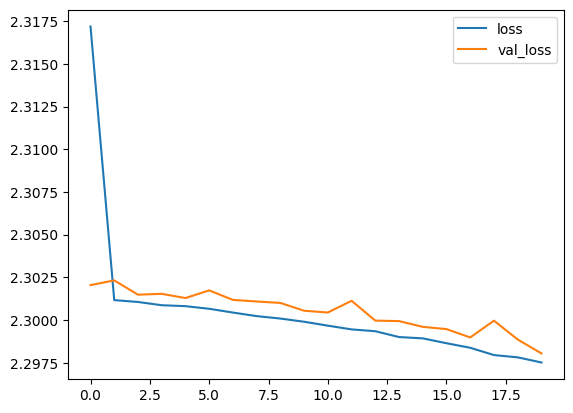

In [8]:
import matplotlib.pyplot as plt
plt.plot(h1.history['loss'], label='loss')
plt.plot(h1.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [9]:
model1.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.2971 - accuracy: 0.1135


[2.297098159790039, 0.11349999904632568]

# 2. relu + SGD

In [10]:
# 2. relu + SGD 조합
# 1) 신경망 설계
# 뼈대
model2 = Sequential()
# 입력층
model2.add(InputLayer(input_shape=(28,28)))
# 사진데이터 (2차원 => 1차원)
model2.add(Flatten())
# 중간층 (5층 (64,128,256,128,64))
model2.add(Dense(units=64, activation='relu'))
model2.add(Dense(units=128, activation='relu'))
model2.add(Dense(units=256, activation='relu'))
model2.add(Dense(units=128, activation='relu'))
model2.add(Dense(units=64, activation='relu'))
# 출력층
model2.add(Dense(units=10, activation='softmax'))


In [11]:
# 2) 학습 방법 및 평가방법 설정
model2.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = SGD(learning_rate=0.01),
    metrics = ['accuracy']
)

In [12]:
# 3) 학습 # epochs = 20
h2 = model2.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs = 20,
    batch_size=128
)

Epoch 1/20
375/375 [==============================] - 4s 9ms/step - loss: 2.8192 - accuracy: 0.3987 - val_loss: 1.2838 - val_accuracy: 0.5342
Epoch 2/20
375/375 [==============================] - 3s 7ms/step - loss: 0.9680 - accuracy: 0.6798 - val_loss: 0.6267 - val_accuracy: 0.8077
Epoch 3/20
375/375 [==============================] - 3s 8ms/step - loss: 0.5686 - accuracy: 0.8227 - val_loss: 0.4628 - val_accuracy: 0.8623
Epoch 4/20
375/375 [==============================] - 3s 9ms/step - loss: 0.4195 - accuracy: 0.8743 - val_loss: 0.3674 - val_accuracy: 0.8889
Epoch 5/20
375/375 [==============================] - 3s 7ms/step - loss: 0.3552 - accuracy: 0.8945 - val_loss: 0.3280 - val_accuracy: 0.9014
Epoch 6/20
375/375 [==============================] - 3s 7ms/step - loss: 0.3181 - accuracy: 0.9046 - val_loss: 0.3018 - val_accuracy: 0.9137
Epoch 7/20
375/375 [==============================] - 3s 7ms/step - loss: 0.2914 - accuracy: 0.9130 - val_loss: 0.2792 - val_accuracy: 0.9178
Epoch 

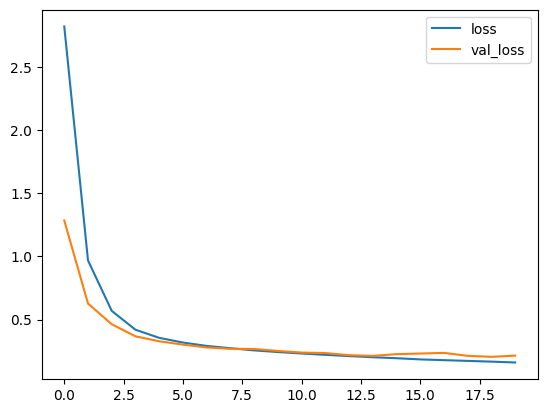

In [13]:
plt.plot(h2.history['loss'], label='loss')
plt.plot(h2.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [14]:
model2.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2238 - accuracy: 0.9369


[0.22383147478103638, 0.9369000196456909]

# 3. relu + adam

In [15]:
# 3. relu + adam 조합
# 1) 신경망 설계
# 뼈대
model3 = Sequential()
# 입력층
model3.add(InputLayer(input_shape=(28,28)))
# 사진데이터 (2차원 => 1차원)
model3.add(Flatten())
# 중간층 (5층 (64,128,256,128,64))
model3.add(Dense(units=64, activation='relu'))
model3.add(Dense(units=128, activation='relu'))
model3.add(Dense(units=256, activation='relu'))
model3.add(Dense(units=128, activation='relu'))
model3.add(Dense(units=64, activation='relu'))
# 출력층
model3.add(Dense(units=10, activation='softmax'))


In [16]:
# 2) 학습 방법 및 평가방법 설정
model3.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = Adam(learning_rate=0.01),
    metrics = ['accuracy']
)

In [17]:
# 3) 학습 # epochs = 20
h3 = model3.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs = 20,
    batch_size=128
)

Epoch 1/20
375/375 [==============================] - 4s 9ms/step - loss: 2.2736 - accuracy: 0.4477 - val_loss: 1.1753 - val_accuracy: 0.5071
Epoch 2/20
375/375 [==============================] - 3s 8ms/step - loss: 1.1358 - accuracy: 0.5810 - val_loss: 1.0686 - val_accuracy: 0.6218
Epoch 3/20
375/375 [==============================] - 4s 10ms/step - loss: 1.0786 - accuracy: 0.6080 - val_loss: 1.0240 - val_accuracy: 0.6208
Epoch 4/20
375/375 [==============================] - 5s 13ms/step - loss: 1.0732 - accuracy: 0.6090 - val_loss: 1.0317 - val_accuracy: 0.6197
Epoch 5/20
375/375 [==============================] - 5s 13ms/step - loss: 1.1193 - accuracy: 0.5867 - val_loss: 1.7643 - val_accuracy: 0.3689
Epoch 6/20
375/375 [==============================] - 6s 16ms/step - loss: 1.1213 - accuracy: 0.5782 - val_loss: 1.0190 - val_accuracy: 0.6224
Epoch 7/20
375/375 [==============================] - 3s 8ms/step - loss: 1.0460 - accuracy: 0.6134 - val_loss: 0.9774 - val_accuracy: 0.6411
Ep

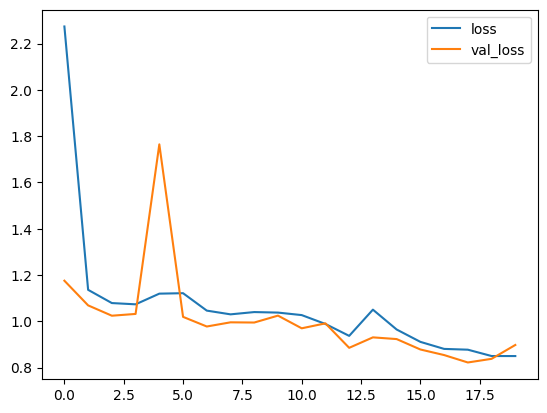

In [18]:
plt.plot(h3.history['loss'], label='loss')
plt.plot(h3.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [19]:
model3.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9133 - accuracy: 0.6692


[0.913335919380188, 0.6692000031471252]

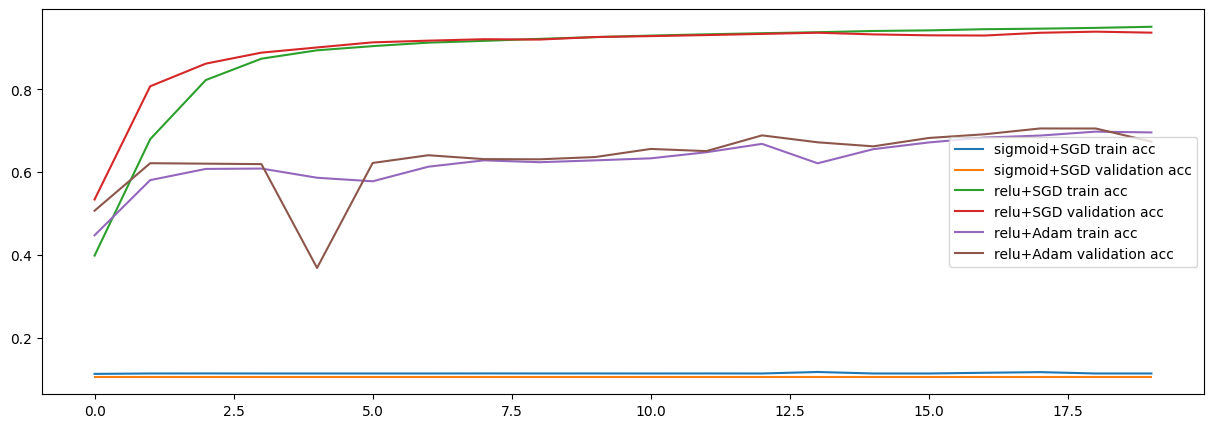

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
# sigmoid + SGD 조합
plt.plot(h1.history['accuracy'], label="sigmoid+SGD train acc")
plt.plot(h1.history['val_accuracy'], label="sigmoid+SGD validation acc")
# relu + SGD 조합
plt.plot(h2.history['accuracy'], label="relu+SGD train acc")
plt.plot(h2.history['val_accuracy'], label="relu+SGD validation acc")
# relu + Adam 조합
plt.plot(h3.history['accuracy'], label="relu+Adam train acc")
plt.plot(h3.history['val_accuracy'], label="relu+Adam validation acc")

plt.legend()
plt.show()


### callback 함수
- 모델저장 및 조기학습중단
- 모델저장 (ModelCheckpoint )
  - 딥러닝모델 학습시 지정된 epoch 를 다 끝내면 과대적합이 일어나는 경우가 있다 -> 중간에 일반화된 모델을 저장할 수 있는 기능!!
- 조기학습 중단 (EarlyStopping)
  - epoch 를 크게 설정할 경우 일정횟수 이상으로는 모델의 성능이 개선되지 않는 경우가 있다.  -> 시간낭비 -> 모델의 성능이 개선되지 않는 경우에는 조기중단이 필요

In [24]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [28]:
model_path = '/content/drive/MyDrive/Colab Notebooks/DeepLearning(Spring)/data/digit_model/dm_{epoch:02d}_{val_accuracy:0.2f}.hdf5'
mckp = ModelCheckpoint(
    filepath = model_path,
    verbose = 1, # 로그 출력, 1: 로그 출력 해주세요
    save_best_only = True, # 모델 성능이 최고점을 갱신할 때마다 저장
    monitor = 'val_accuracy' # 최고점의 기준치
)

In [29]:
# 조기학습 중단
early = EarlyStopping(
    monitor = 'val_accuracy', # 기준치
    verbose = 1, # 로그 출력
    patience = 10 # 모델 성능 개선을 기다리는 최대 횟수
)

In [ ]:
# 3번째 조합으로 모델링 (relu + adam)
model3.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = Adam(learning_rate=0.01),
    metrics = ['accuracy']
)

h4 = model3.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs = 1000,
    batch_size=128,
    callbacks = [mckp, early]
)

# 가장 우수한 모델 불러오기

In [34]:
from tensorflow.keras.models import load_model
best_model = load_model('/content/drive/MyDrive/Colab Notebooks/DeepLearning(Spring)/data/digit_model/dm_19_0.73.hdf5')

In [39]:
# 파이썬에서 이미지를 처리하는 라이브러리
import PIL.Image as pimg
import numpy as np
# 이미지 오픈, 흑백이미지로 변경

def img_pre(i):
  img = pimg.open(f'/content/drive/MyDrive/Colab Notebooks/DeepLearning(Spring)/손글씨/{i}').convert('L')
  # 전처리
  # 이미지 타입을 배열로 변환
  img = np.array(img)
  img.shape
  # 2차원 => 1차원f
  test_img =img.reshape(1, 28, 28, 1)
  test_img.astype('float32') /255
  pre = best_model.predict(test_img)
  print(f'{i} : ', pre, np.argmax(pre))
  return np.argmax(pre)

# 예측
for i in range(10):
  img_pre(f'{i}.png')

1/1 [==============================] - 0s 119ms/step
0.png :  [[0.2111117  0.00125963 0.04984907 0.60507965 0.00236843 0.07948569
  0.02694222 0.00205655 0.01377031 0.00807682]] 3
1/1 [==============================] - 0s 67ms/step
1.png :  [[0.01580082 0.00729506 0.30235898 0.4925361  0.00349363 0.03596889
  0.12064107 0.00614761 0.01446153 0.00129621]] 3
1/1 [==============================] - 0s 55ms/step
2.png :  [[5.2355495e-03 4.6567477e-02 4.2827269e-01 2.0626922e-01 2.8837284e-03
  2.1542955e-02 2.7549201e-01 4.0224516e-03 9.3253488e-03 3.8856998e-04]] 2
1/1 [==============================] - 0s 37ms/step
3.png :  [[4.8255609e-04 8.9074057e-03 3.1374100e-01 1.5786694e-02 4.0169563e-03
  5.1437705e-03 6.4779615e-01 4.5518446e-04 3.6551212e-03 1.5037575e-05]] 6
1/1 [==============================] - 0s 62ms/step
4.png :  [[0.00367656 0.01889876 0.02214495 0.03172068 0.527827   0.01053826
  0.00907576 0.01801693 0.15397249 0.20412861]] 4
1/1 [==============================] - 0s 38